### **Laboratory Task 6: Medical Image Processing and Enhancement**

#### **Task 1: Apply Logarithmic Transformation to an X-ray Image**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load grayscale image
img_path = '/content/drive/MyDrive/AI in healthcare/labtask6/XRU.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Invert image for better log enhancement
img_inverted = 255 - img  # Correct inversion
img_float = img_inverted.astype(np.float32)  # Now convert to float


In [ ]:
# Apply log transform
c = 40
log_img = c * np.log1p(img_float)

In [ ]:
# Normalize and convert to uint8
log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
log_img = np.uint8(log_img)

In [ ]:
# Invert back to original tone
final_img = 255 - log_img

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

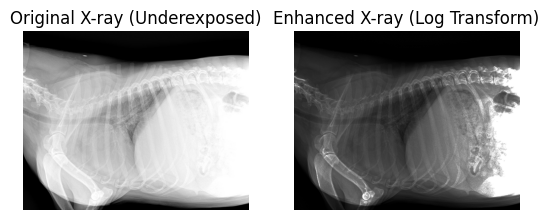

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original X-ray (Underexposed)')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(final_img, cmap='gray')
plt.title('Enhanced X-ray (Log Transform)')
plt.axis('off')
plt.show()

###**Observation**
Enhanced image reveals hidden anatomical details like ribs and lung patterns that were previously unclear

####**Task 2: Use Histogram Equalization to Enhance a Mammogram**
   ##### Load a mammogram image
   ##### Apply histogram equalization
  ##### Goal: Improve contrast, especially in dense tissue areas

In [ ]:
img_path = '/content/drive/MyDrive/AI in healthcare/labtask6/mmg.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Apply Histogram Equalization
equalized = cv2.equalizeHist(img)

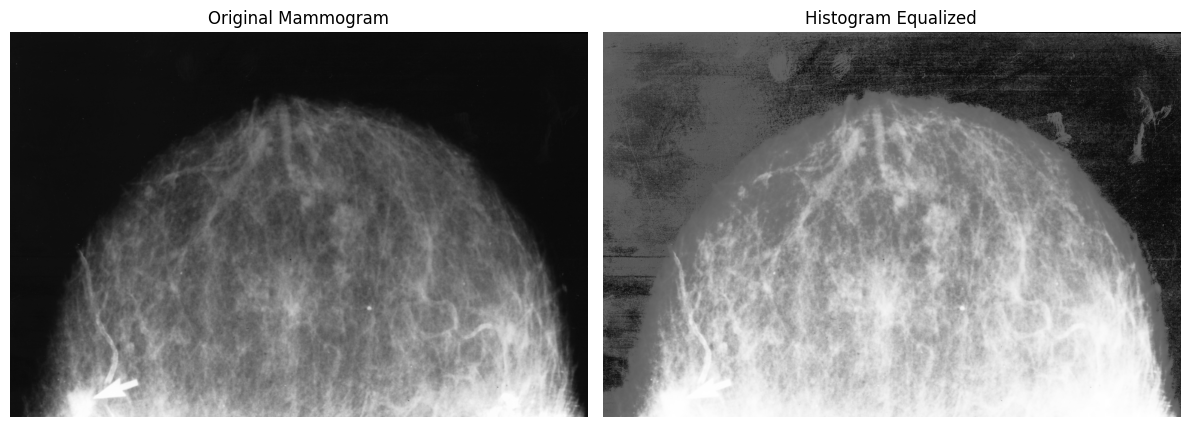

In [ ]:
# Plot original and equalized images side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Mammogram')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()

##### **Observation**
**Original Mammogram (Left):**
*   Appears darker, especially in denser tissue regions.
*   Low contrast in some areas—making it harder to distinguish fine details.
*   Background and dense tissue may blend due to poor brightness/contrast levels.
#####**Histogram Equalized Image (Right):**
*   The contrast is significantly enhanced.
*   Dense tissues, fibrous structures, and edges are more distinguishable.
*   However, there is some amplification of noise in the background (top area).
*   The image looks brighter overall, aiding visual analysis.











##### **Conclusions**

*   Histogram Equalization is effective in enhancing contrast in medical images like mammograms.
*   It helps highlight subtle features that may be difficult to detect in the original image.
*   However, it may also amplify noise or artifacts, so it should be used carefully—sometimes followed by denoising techniques.
*   This enhancement can support better diagnosis and more accurate region labeling in downstream tasks like segmentation or classification.

#### **Task 3 Compare Mean and Median Filtering on a Noisy CT Image**
 Load a CT image and add Gaussian noise

 Goal: Compare which filter better removes noise while preserving edges

In [ ]:
# Load CT image in grayscale
img_path = '/content/drive/MyDrive/AI in healthcare/labtask6/CT.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

In [ ]:
# Apply Mean filter
mean_filtered = cv2.blur(noisy_img, (5, 5))

In [ ]:
# Apply Median filter
median_filtered = cv2.medianBlur(noisy_img, 5)

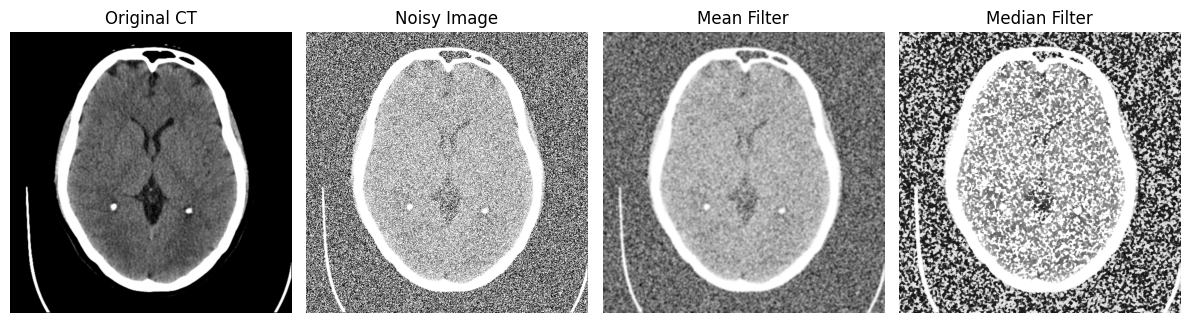

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original CT")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


##### **Conclusion / Observation:**
Mean Filter smooths the noise but blurs the edges.

Median Filter effectively removes salt-and-pepper noise while preserving edge details.

Median filtering is generally better suited for medical images, where edge preservation is crucial for diagnosis.

#### **Task 4: Display the Fourier Spectrum of a Grayscale MRI**
Load and process an MRI scan

Goal: Interpret low-frequency and high-frequency regions in the spectrum

In [ ]:
# Load grayscale MRI image
img_path = '/content/drive/MyDrive/AI in healthcare/labtask6/MRILAB.jpg'
mri = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


In [ ]:
# Apply 2D Fourier Transform
f = np.fft.fft2(mri)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

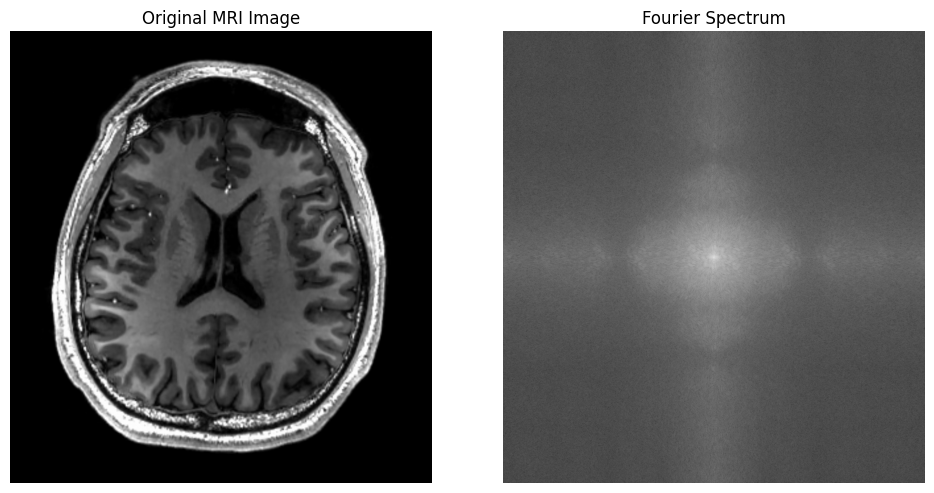

In [ ]:
# Plot original and spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mri, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

##### **Observation / Interpretation:**
Center of the spectrum = low-frequency components (general shape and contrast).

Edges and corners = high-frequency components (fine details and noise).

Bright central region → image is dominated by smooth variations (common in MRI).

Peripheral dots or spikes → high-frequency edges or artifacts.

##### **Conclusion:**
Fourier spectrum helps us understand how much detail (high frequency) vs smoothness (low frequency) is present in a medical image.

#### **Task 5: Decompose an Ultrasound Image Using Wavelet Transform**

Perform 1-level wavelet decomposition and reconstruction

Goal: Analyze decomposition levels and quality of reconstruction

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.4 MB/s eta 0:00:00


In [ ]:
import pywt
import pywt.data

In [ ]:
# Load grayscale ultrasound image
img_path = '/content/drive/MyDrive/AI in healthcare/labtask6/Ultrasound.jpg'
ultrasound = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Perform 1-level wavelet decomposition using Haar wavelet
coeffs2 = pywt.dwt2(ultrasound, 'haar')
cA, (cH, cV, cD) = coeffs2  # Approximation and detail coefficients

In [ ]:
# Reconstruct image from wavelet coefficients
reconstructed_img = pywt.idwt2(coeffs2, 'haar')

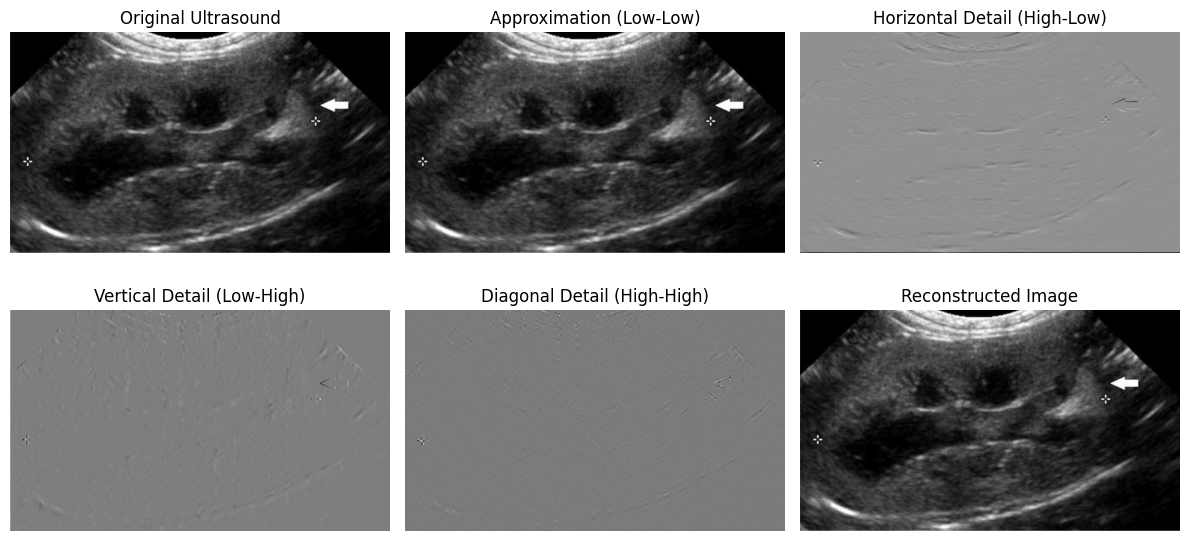

In [ ]:

# Plot original and components
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(ultrasound, cmap='gray')
plt.title('Original Ultrasound')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cA, cmap='gray')
plt.title('Approximation (Low-Low)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail (High-Low)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail (Low-High)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cD, cmap='gray')
plt.title('Diagonal Detail (High-High)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


##### **Observation**
The original ultrasound image was decomposed into 4 parts using 1-level Haar wavelet:

**LL** Approximation (retains overall structure and intensity)

**LH** Horizontal details (highlights vertical edges)

**HL** Vertical details (highlights horizontal edges)

**HH** Diagonal edges (captures fine textures)

The reconstructed image closely matches the original, showing
high-quality preservation


##### **Conclusion**
Wavelet decomposition isolates image features at multiple scales, and the reconstruction confirms that key information is preserved wellafter compression.bold text